# Linear Regression

In [23]:
import numpy as np

import pandas as pd
pd.set_option("mode.copy_on_write", True)

import copy
import matplotlib.pyplot as plt

## Linear relationship

In a lab, different weights are hung from a spring. The extension of the spring is measured each time. 

According to **Hooke’s Law**:  
$$
F = kx \Rightarrow x = \frac{F}{k}
$$

Where:

- $ F $: force applied (in Newtons)  
- $ x $: spring extension (in meters)  
- $ k $: spring constant (N/m)  

Assume some experimental noise to simulate a real-world scenario.


### Data Simulation
Usually you would use here real measurement data

In [24]:
np.random.seed(42)  # for reproducibility

spring_constant = np.random.rand(1)*4 + 4

forces = np.arange(1, 11, 0.5)
true_extensions = forces / spring_constant

noise = np.random.normal(0, 0.1, forces.shape)
measured_extensions = true_extensions + noise

# Create DataFrame for reference
df = pd.DataFrame({
    'Force_N': forces,
    'Extension_cm': measured_extensions
})
df.head()

,Force_N,Extension_cm
0,1.0,0.070691
1,1.5,0.304709
2,2.0,0.391662
3,2.5,0.555749
4,3.0,0.487549


Text(0.5, 0, 'Force [N]')

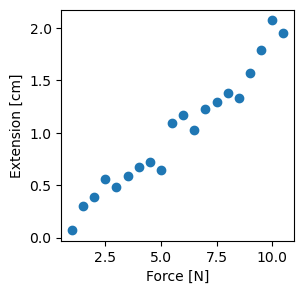

In [25]:
fig, ax = plt.subplots(1,1, figsize=(3,3)) 

ax.scatter(
    df['Force_N'], 
    df['Extension_cm'],
    label='Measurement'
)

ax.set_ylabel('Extension [cm]')
ax.set_xlabel('Force [N]')

### Fit Linear Regression Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression(fit_intercept=False)
model.fit(df[['Force_N']], df['Extension_cm'])

LinearRegression(fit_intercept=False)

#### Generate predictions for new data

In [31]:
new_forces = np.arange(0.5, 10.5, 0.2)
predicted_extension = model.predict(new_forces.reshape(-1, 1))

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


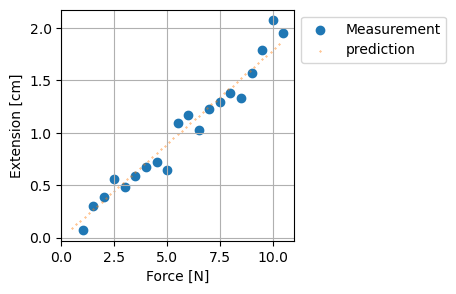

In [32]:
fig2 = copy.deepcopy(fig)
ax = fig2.axes[0]

ax.scatter(
    new_forces, 
    predicted_extension, 
    s=0.1, # marker size
    label = 'prediction'
)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid()

fig2

#### Obtain parameters

In [33]:
slope = model.coef_[0]
intercept = model.intercept_

print(f"Estimated spring constant k ≈ {1/slope:.3f} N/cm")
print(f"Regression Line: Extension ≈ {slope:.3f} * Force + {intercept:.3f}")

Estimated spring constant k ≈ 5.584 N/cm
Regression Line: Extension ≈ 0.179 * Force + 0.000


## Quadratic relationship

For some materials (like rubber), the relationship between force $F$ and extension $x$ can be nonlinear, especially at large deformations. A simplified model might resemble:
$x \sim F^2$.

Let's first assume such a quadratic dependeny:

### Data Simulation

In [34]:
np.random.seed(42)  # for reproducibility

inv_spring_constant = 1 / (np.random.rand(1)*5 + 20)

forces = np.arange(1, 11, 0.5)
true_extensions = inv_spring_constant * forces**2

noise = np.random.normal(0, 0.1, forces.shape)
measured_extensions = true_extensions + noise

# Create DataFrame for reference
df = pd.DataFrame({
    'Force [N]': forces,
    'Extension [cm]': measured_extensions
})
df.head()

,Force [N],Extension [cm]
0,1.0,-0.065469
1,1.5,0.134758
2,2.0,0.210780
3,2.5,0.386796
4,3.0,0.353384


In [35]:
def scatter_force_extension(df, x, y, ax, **kwargs):
    ax.scatter(df[x], df[y], **kwargs)
    ax.set_ylabel(y)
    ax.set_xlabel(x)
    ax.grid(True)

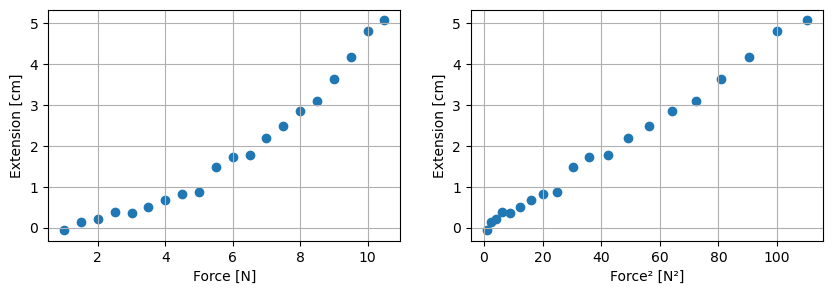

In [36]:
fig, axes = plt.subplots(1,2, figsize=(10,3)) 

scatter_force_extension(df, x = 'Force [N]', y = 'Extension [cm]', ax=axes[0], label='Measurement')

df['Force² [N²]'] = df['Force [N]']**2
scatter_force_extension(df, x = 'Force² [N²]', y = 'Extension [cm]', ax=axes[1], label='Measurement')

### Fit Linear Regression Model

In [37]:
model1 = LinearRegression(fit_intercept=False)
model1.fit(df[['Force [N]']], df['Extension [cm]'])

model2 = LinearRegression(fit_intercept=False)
model2.fit(df[['Force² [N²]']], df['Extension [cm]'])

new_forces = pd.DataFrame(np.arange(1, 11, 0.1), columns=['Force [N]'])
new_forces['Force² [N²]'] = new_forces['Force [N]']**2

new_forces['Predicted M1 [cm]'] = model1.predict(new_forces[['Force [N]']])
new_forces['Predicted M2 [cm]'] = model2.predict(new_forces[['Force² [N²]']])

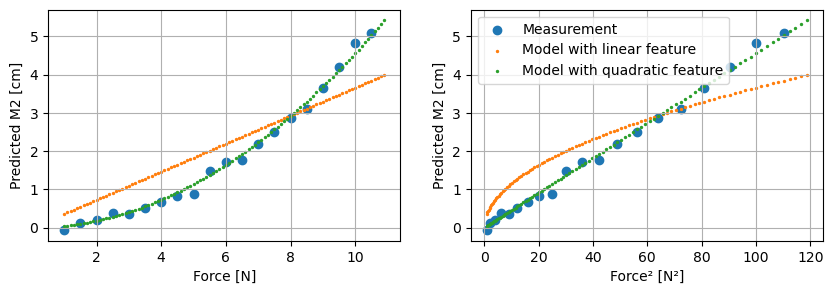

In [38]:
fig, axes = plt.subplots(1,2, figsize=(10,3)) 

scatter_force_extension(df, x = 'Force [N]', y = 'Extension [cm]', ax=axes[0])
scatter_force_extension(df, x = 'Force² [N²]', y = 'Extension [cm]', ax=axes[1], label='Measurement')

ax = axes[0]
label1 = 'Model with linear feature'
label2 = 'Model with quadratic feature'
scatter_force_extension(new_forces, x = 'Force [N]', y = 'Predicted M1 [cm]', ax=ax, label=label1, s=2)
scatter_force_extension(new_forces, x = 'Force [N]', y = 'Predicted M2 [cm]', ax=ax, label=label2, s=2)

ax = axes[1]
scatter_force_extension(new_forces, x = 'Force² [N²]', y = 'Predicted M1 [cm]', ax=ax, label=label1, s=2)
scatter_force_extension(new_forces, x = 'Force² [N²]', y = 'Predicted M2 [cm]', ax=ax, label=label2, s=2)

_ = axes[1].legend()

## Generell non-linear relatinship

In practice, the relationship between force $F$ and extension $x$ in real materials may include linear, quadratic, and even higher-order polynomial terms.

### Data Simulation

In [39]:
# Random coefficients for each term (kept small for realistic extensions)
np.random.seed(12)

# Force values
forces = np.arange(4, 20, 2)

# Compute true extension 
def calc_extension(forces, a1 = 0.1, a2 = 0.5, a3 = 0.05): 
    return a1*forces + a2 * forces**2 + a3 * forces**3 

true_extensions = calc_extension(forces)
noise = np.random.normal(0, 10, forces.shape)
measured_extensions = true_extensions + noise

# Create DataFrame
df = pd.DataFrame({
    'Force [N]': forces,
    'Extension [cm]': measured_extensions
})
df.head()

,Force [N],Extension [cm]
0,4,16.329858
1,6,22.585741
2,8,60.824395
3,10,83.992644
4,12,167.131428


Often, we do not know the exact relationship and must experiment.
To this end, we first prepare a function that generates various polynomial terms of the force.

In [40]:
def to_superscript(x):
    if x == 1:
        return '\u00B9'
    if x == 2:
        return '\u00B2'
    if x == 3:
        return '\u00B3'  
    return chr(0x2070 + x)


def add_poly(df, degrees:list[int]):

    for degree in degrees:
        sup = to_superscript(degree)
        df[f'Force{sup} [N{sup}]'] = df['Force [N]']**degree

    return df

In [81]:
features = add_poly(df[['Force [N]']], range(2,4))
features.head()

,Force [N],Force² [N²],Force³ [N³]
0,4,16,64
1,6,36,216
2,8,64,512
3,10,100,1000
4,12,144,1728


### Fit Linear Regression Model

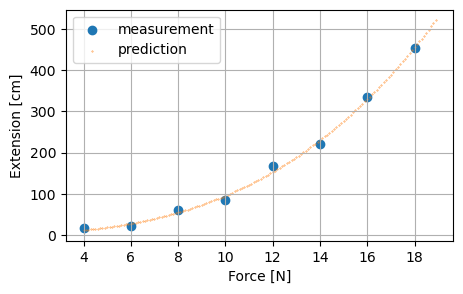

In [75]:
degrees = range(2,4)
features = add_poly(df[['Force [N]']], degrees)

model = LinearRegression(fit_intercept=False)
model.fit(features, df['Extension [cm]'])

hypothetical_forces = pd.DataFrame(np.arange(4, 19, 0.1), columns=['Force [N]'])
hypothetical_forces = add_poly(hypothetical_forces, degrees)

predicted_extension = model.predict(hypothetical_forces)

fig, ax = plt.subplots(1,1, figsize=(5,3)) 
scatter_force_extension(df, x = 'Force [N]', y = 'Extension [cm]', ax=ax, label='measurement')
ax.scatter(hypothetical_forces['Force [N]'], predicted_extension, s=0.1, label = 'prediction')
ax.legend()

We can choose different polynomial parameters. But what is the best one?

Assume we measure new data:

In [76]:
new_forces = np.arange(5, 18, 2)
true_extensions = calc_extension(new_forces)
np.random.seed(15)
noise = np.random.normal(0, 10, new_forces.shape)
measured_extensions = true_extensions + noise

# Create DataFrame
new_measurement = pd.DataFrame({
    'Force [N]': new_forces,
    'Extension [cm]': measured_extensions
})
new_measurement = add_poly(new_measurement, degrees)
new_measurement.head()

,Force [N],Extension [cm],Force² [N²],Force³ [N³]
0,5,16.126715,25,125
1,7,45.742847,49,343
2,9,76.290915,81,729
3,11,123.132103,121,1331
4,13,198.005689,169,2197


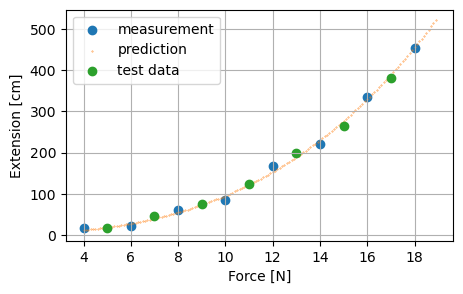

In [77]:
ax.scatter(new_measurement['Force [N]'], new_measurement['Extension [cm]'], label = 'test data')
ax.legend()
fig

Then we can compare the prediction vs. the actual measured data.

In [78]:
new_measurement['predicted_extension'] = model.predict(new_measurement[model.feature_names_in_])
new_measurement

,Force [N],Extension [cm],Force² [N²],Force³ [N³],predicted_extension
0,5,16.126715,25,125,18.850740
1,7,45.742847,49,343,40.058361
2,9,76.290915,81,729,73.527618
3,11,123.132103,121,1331,122.226333
4,13,198.005689,169,2197,189.122331
5,15,265.113947,225,3375,277.183433
6,17,380.891380,289,4913,389.377464


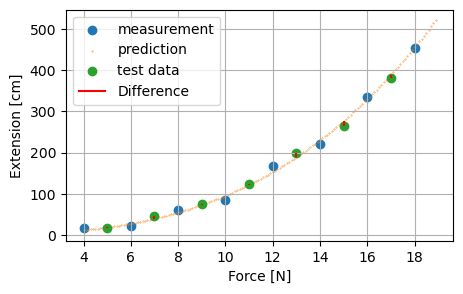

In [79]:
difference = new_measurement['Extension [cm]'] - new_measurement['predicted_extension']

ax.vlines(
    new_measurement['Force [N]'], new_measurement['Extension [cm]'], new_measurement['predicted_extension'],
    colors='red', linestyles='solid', label='Difference'
)

ax.legend()
fig

In [80]:
mean_absolute_error = difference.abs().mean()
mean_squared_error = (difference**2).mean()
root_mean_quared_error = np.sqrt(mean_squared_error)

print(f' MAE: {mean_absolute_error:.2f}')
print(f'RMSE: {root_mean_quared_error:.2f}')

 MAE: 5.93
RMSE: 7.02
